

## Objectives



    
1. Value and Size portfolios
2. Multi-factor models
3. Multi asset testing of multi factor models. The GRS test again
4. Principal component analysis
5. Why portfolios?




In [1]:
# First we start loading our favourite packages with the names we used to
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# import regression package
import statsmodels.api as sm

Need to split this and the old notebok 5 (Notebook_418_5) so there is one notebook on testing, one on value, and one on factor (new material) investing

In [2]:
# import 25 Booktomarket and size sorted portfolios

# but it changes....

url = "https://www.dropbox.com/s/ivay1g27nlxz7ml/25_Portfolios_5x5.CSV?dl=1"
parser = lambda date: pd.to_datetime(date,format='%Y%m')
Data = pd.read_csv(url,index_col=0, \
                         parse_dates=True,date_parser=parser,skiprows=19,nrows=1092,na_values=-99.99)
Data=Data/100
# neeed to adjsut the date to end of month convention (Even thugh both returns for a given month are end-of-month to end of month,
# when we importer the value portfolios python used as date the first day of the month . To fix that, we will convert it to end of month
# It is important to do that before the merge. Why? )
Data.index=Data.index+pd.tseries.offsets.MonthEnd()
Data=Data['7-1963':'12-1993']
# ready to merge with Market and RF
Data.head()


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
1963-07-31,0.0085,0.0024,0.0056,-0.0002,-0.0122,-0.0187,0.0029,-0.0084,-0.0190,-0.0119,...,-0.0093,-0.0163,-0.0207,-0.0167,-0.0186,0.0014,0.0046,0.0123,-0.0045,-0.0111
1963-08-31,0.0380,0.0215,0.0132,0.0229,0.0473,0.0540,0.0465,0.0436,0.0433,0.0823,...,0.0559,0.0481,0.0612,0.0756,0.0535,0.0577,0.0422,0.0477,0.0816,0.0625
1963-09-30,-0.0270,0.0026,-0.0109,-0.0159,-0.0038,-0.0392,-0.0157,-0.0064,-0.0113,-0.0291,...,-0.0267,-0.0195,-0.0200,-0.0358,-0.0199,-0.0137,-0.0077,-0.0098,-0.0012,-0.0382
1963-10-31,0.0136,-0.0063,0.0124,0.0005,0.0237,0.0119,0.0430,0.0234,0.0226,0.0393,...,-0.0025,0.0093,0.0230,0.0534,0.0061,0.0533,0.0173,-0.0026,0.0236,0.0048
1963-11-30,-0.0311,-0.0432,-0.0160,-0.0100,-0.0111,-0.0418,-0.0176,-0.0071,-0.0009,-0.0011,...,-0.0091,-0.0086,-0.0051,0.0115,0.0354,-0.0126,0.0098,-0.0155,-0.0205,0.0137


Lets construct a 3 plot, where 
- in the z-axis we have the mean returns of the different portoflios
- in the x-axis the size quantile of the portfolio small, 2,...Big
- In the y-axis the Bm quantile, growth, 2,3....Value

In [3]:

# lets do a 3dplot to get some intution
# here I am constructing two  variables to tracks the size and book to market  quantile of each portfolio 
Size=np.array(range(1,6))
Size=np.repeat(Size,5)
BM=np.array(range(1,6))
BM.shape=(1,5)
BM=np.repeat(BM,5,axis=0)
BM.shape=(1,25)
BM=BM[0]
print(BM)
print(Size)

[1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5]
[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5]


<IPython.core.display.Javascript object>


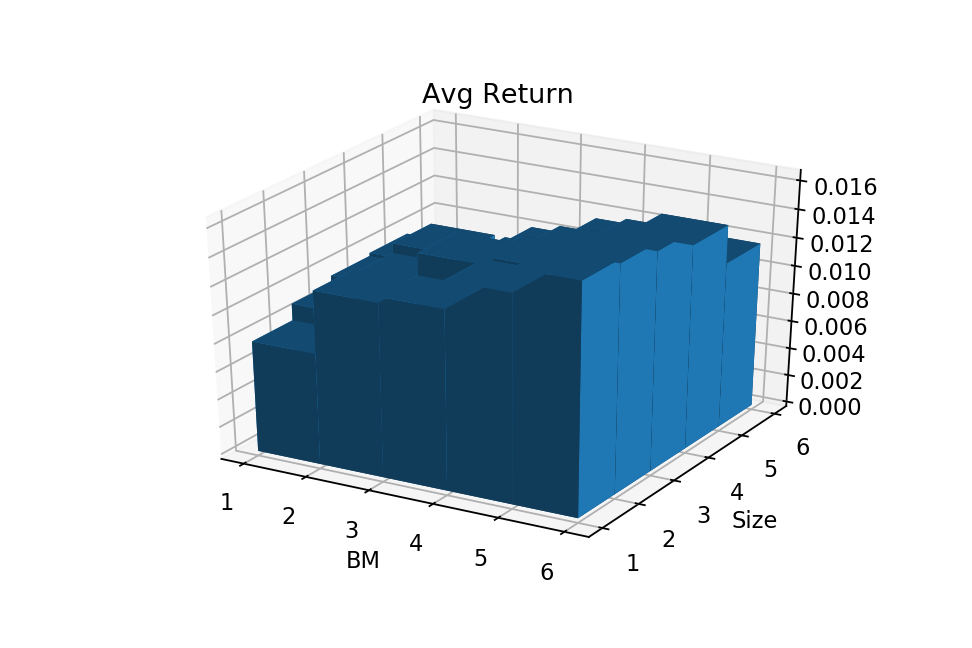

Text(0.5,0.92,'Avg Return')

In [4]:
# this is an alternative way of importing the ploting package that allows for some interactivity
%matplotlib notebook
import matplotlib.pyplot as plt

# specially useful for 3d
# this below allow us to do 3d plots

from mpl_toolkits.mplot3d import Axes3D

# here is
z=Data.mean()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
top = z
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(BM,Size, bottom, width, depth, top)
plt.xlabel('BM')
plt.ylabel('Size')
ax.set_title('Avg Return')

# Value and Size

What exactly are these 25 portfolios?

How Eugene Fama and Ken French constructed these portfolios?

From Table 1:

"At the end of June of each year t (1963-1993), NYSE, AMEX, and Nasdaq stocks are allocated to two groups (small or big, S or B) based on whether their June market equity (ME, stock price times shares outstanding) is below or above the median ME for NYSE stocks. 

NYSE, AMEX, and Nasdaq stocks are allocated in an independent sort to three book-to-market equity (BE/ME) groups (low, medium, or high; L, M, or H) based on the breakpoints for the bottom 30 percent, middle 40 percent, and top 30 percent of the values of BE/ME for NYSE stocks. 

Six size-BE/ME portfolios (S/L, S/M, S/H, B/L, B/M, B/H) are defined as the intersections of the two ME and the three BE/ME groups. 

Value-weight monthly returns on the portfolios are calculated from July to the following June. 

The 25 size-BE/ME portfolios are formed like the six size-BE/ME portfolios used to construct SMB and HML, except that quintile breakpoints for ME and BE/ME for NYSE stocks are used to allocate NYSE, AMEX, and Nasdaq stocks to the portfolios.

BE is the COMPUSTAT book value of stockholders' equity, plus balance sheet deferred taxes and investment tax credit (if available), minus the book value of preferred stock. Depending on availability, we use redemption, liquidation, or par value (in that order) to estimate the book value of preferred stock. The BE/ME ratio used to form portfolios in June of year t is then book common equity for the fiscal year ending in calendar year t - 1, divided by market equity at the end of December of t - 1. We do not use negative BE firms, which are rare prior to 1980, when calculating the breakpoints for BE/ME or when forming the size-BE/ME portfolios. 

Also, only firms with ordinary common equity (as classified by CRSP) are included in the tests. This means that ADR's, REIT's, and units of beneficial interest are excluded.""



1. Each year get all U.S. stocks and sort then in 5 buckets according to their market capitalization (price per share \* shares outstanting)
  * small quirk: they use NYSE breakpoint instead of the breakpoint for the entire universe
  * for example if you have 400 firms (like US had in the 30's), you would have 80 firms in each bucket 

2. You then repeat this procedure but now use book to market as a the sorting variable

3. Find the 25 portfolios by looking at the intercection of these two sorts
   
    - What is book equity exactly?
    
    "BE is the COMPUSTAT book value of stockholders' equity, plus balance sheet deferred taxes and investment tax credit (if available), minus the book value of preferred stock. Depending on availability, we use redemption, liquidation, or par value (in that order) to estimate the book value of preferred stock.  We do not use negative BE firm."
  
  - it is accounting measure of firm asset value
  - Example: a firm that inssues 1000 dollar of common stock, buy equipement and produce 200 dollars of net earnings will have 1200 of book equity in the end of the period
  - It's market value will be retemined by asset markets (expectations of future earnings, variation in discount rates)
 

So basically when BE/ME is low, it must mean that 

 1. either the market is forecasting a great run for the company, so it is pricing in a large growth in earnings
 2. or the market has a much lower discount rate for this firm,and firms with low BM have a low return going forward
 3. Or both things!
 
 It turns out that both things are true, But for us we case that (2.) is true and variation in Book to market across firms comes associanted with variaiton in average returns


LEts seem how well the CAPM does it

In [5]:
url = "https://www.dropbox.com/s/9346pp2iu5prv8s/MonthlyFactors.csv?dl=1"
Factors = pd.read_csv(url,index_col=0, 
                         parse_dates=True,na_values=-99)
Factors=Factors/100
# keep only market and RF
Factors=Factors.iloc[:,0:2]


Data=pd.merge(Data,Factors,left_index=True,right_index=True)

Data=Data.drop('RF',axis=1).subtract(Data['RF'],axis=0)

Data.mean()

SMALL LoBM    0.002614
ME1 BM2       0.007029
ME1 BM3       0.007457
ME1 BM4       0.009406
SMALL HiBM    0.011049
ME2 BM1       0.003798
ME2 BM2       0.006775
ME2 BM3       0.009002
ME2 BM4       0.009580
ME2 BM5       0.010746
ME3 BM1       0.004335
ME3 BM2       0.007439
ME3 BM3       0.006954
ME3 BM4       0.008864
ME3 BM5       0.010142
ME4 BM1       0.004548
ME4 BM2       0.004114
ME4 BM3       0.006618
ME4 BM4       0.008032
ME4 BM5       0.009139
BIG LoBM      0.003232
ME5 BM2       0.003706
ME5 BM3       0.003705
ME5 BM4       0.005321
BIG HiBM      0.006471
MKT           0.004199
dtype: float64

Lets first start by checking wheter the CAPM can price these portfolios

<IPython.core.display.Javascript object>


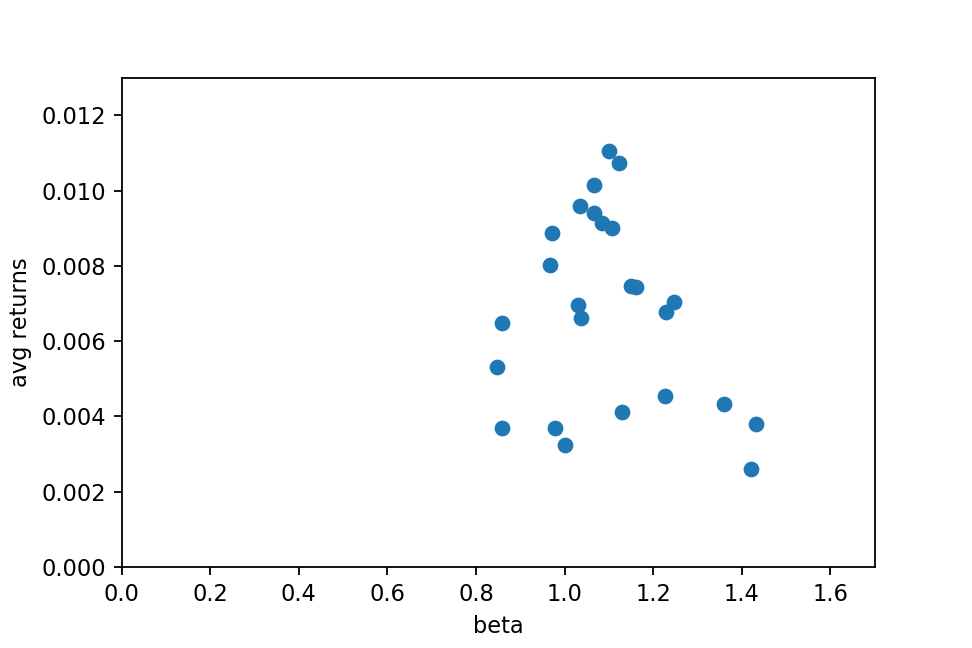

Text(0,0.5,'avg returns')

In [6]:
CAPM=pd.DataFrame([],index=Data.drop(['MKT'],axis=1).columns,columns=['avg','alpha','talpha','beta','tbeta'])   
CAPM['avg']=Data.drop(['MKT'],axis=1).mean()

for portfolios in CAPM.index:
    y=Data[portfolios]
    x=Data['MKT']
    x=sm.add_constant(x)
    results = sm.OLS(y,x).fit()
    CAPM.at[portfolios,'alpha']=results.params[0]
    CAPM.at[portfolios,'talpha']=results.params[0]/results.HC0_se[0]
    CAPM.at[portfolios,'beta']=results.params[1]
    CAPM.at[portfolios,'tbeta']=results.params[1]/results.HC0_se[1]


plt.scatter(CAPM.beta,CAPM.avg)
plt.show()
plt.axis([0,1.7,0,0.013])
plt.xlabel('beta')
plt.ylabel('avg returns')

- This pattern is inconsistent!
- Betas and excess returns do not line up!
- The pattern before would ahve been perfectly consistent if the betas lined up with the variation in excess return
- The CAPM allows all sort of variaiton of expected returns characteristics
- But this variaiton should also drive betas!

<IPython.core.display.Javascript object>


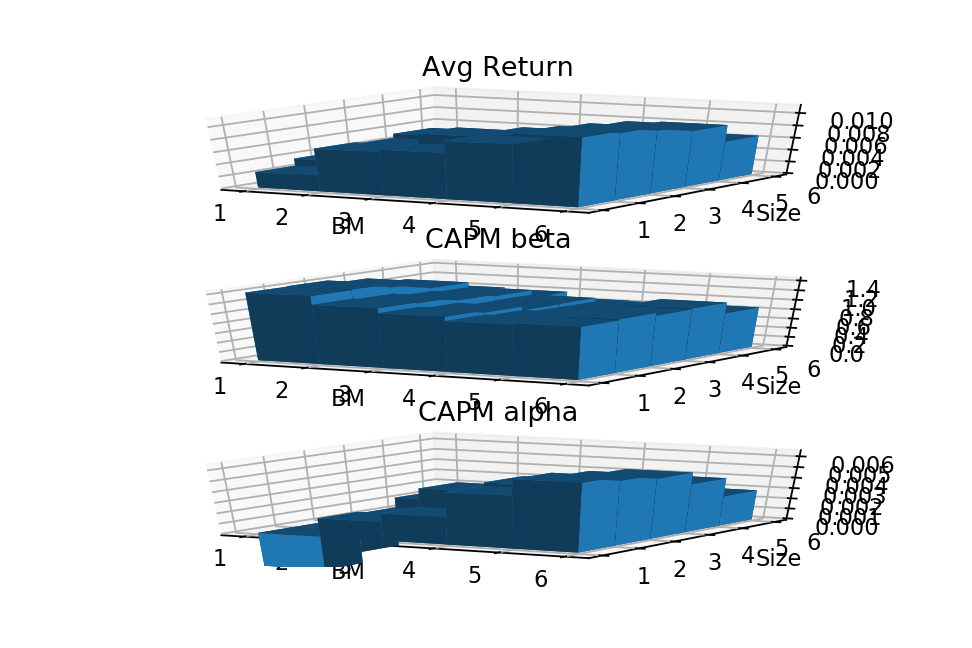

Text(0.5,0.92,'CAPM alpha')

In [7]:
# again lets look in 3d
%matplotlib notebook
import matplotlib.pyplot as plt
z1=Data.drop(['MKT'],axis=1).mean()
z2=CAPM.beta.values
z3=CAPM.alpha.values
fig = plt.figure()
ax = fig.add_subplot(311, projection='3d')
top = z1
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(BM,Size, bottom, width, depth, top)
plt.xlabel('BM')
plt.ylabel('Size')
ax.set_title('Avg Return')
ax = fig.add_subplot(312, projection='3d')
top = z2
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(BM,Size, bottom, width, depth, top)
plt.xlabel('BM')
plt.ylabel('Size')
ax.set_title('CAPM beta')

ax = fig.add_subplot(313, projection='3d')
top = z3
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(BM,Size, bottom, width, depth, top)
plt.xlabel('BM')
plt.ylabel('Size')
ax.set_title('CAPM alpha')

# Multi-factor models

- Lets Test wheter augmenting the CAPM with the additional size factor and value factor can help us price these portfolios
- it is basically the same as before but now we run a multivariate regression

$$R_{i,t}=\alpha_i+\beta_1 Factor_1+\beta_2 Factor_2+\beta_3 Factor_3+....+\beta_n Factor_n$$

As long the factors **are also excess returns** the time-series alpha test is still valid and indentical as before.

- You can do single asset tests and simply use the alpha tstat to test the model

- or you can do multi-asset tests, which use the GRS test 




In [10]:
url = "https://www.dropbox.com/s/9346pp2iu5prv8s/MonthlyFactors.csv?dl=1"
Factors = pd.read_csv(url,index_col=0, 
                         parse_dates=True,na_values=-99)
Factors=Factors/100
# keep only market and RF
Factors=Factors.iloc[:,2:4]
Factors.head()

,SMB,HML
Date,,
1926-07-31,-0.0230,-0.0287
1926-08-31,-0.0140,0.0419
1926-09-30,-0.0132,0.0001
1926-10-31,0.0004,0.0051
1926-11-30,-0.0020,-0.0035


In [11]:
Data=pd.merge(Data,Factors,left_index=True,right_index=True)
# no need to take out risk-free rate because these factors are already excess returns
Data.mean()

SMALL LoBM    0.002614
ME1 BM2       0.007029
ME1 BM3       0.007457
ME1 BM4       0.009406
SMALL HiBM    0.011049
ME2 BM1       0.003798
ME2 BM2       0.006775
ME2 BM3       0.009002
ME2 BM4       0.009580
ME2 BM5       0.010746
ME3 BM1       0.004335
ME3 BM2       0.007439
ME3 BM3       0.006954
ME3 BM4       0.008864
ME3 BM5       0.010142
ME4 BM1       0.004548
ME4 BM2       0.004114
ME4 BM3       0.006618
ME4 BM4       0.008032
ME4 BM5       0.009139
BIG LoBM      0.003232
ME5 BM2       0.003706
ME5 BM3       0.003705
ME5 BM4       0.005321
BIG HiBM      0.006471
MKT           0.004199
SMB           0.002835
HML           0.004681
dtype: float64

In [41]:
 
# indentical code as before. Just add the two new factors to the regression
FF3=pd.DataFrame([],index=Data.drop(['MKT','HML','SMB'],axis=1).columns,\
                 columns=['avg','alpha','talpha','betamkt','tbetamkt','betahml','tbetahml','betasmb','tbetasmb']) 
# create dataframe to store residual
FF3Resid=Data.drop(['MKT','HML','SMB'],axis=1).copy()
#store avg return
FF3['avg']=Data.drop(['MKT','HML','SMB'],axis=1).mean()

for portfolio in FF3.index:
    y=Data[portfolio]
    x=Data[['MKT','HML','SMB']]
    x=sm.add_constant(x)
    results = sm.OLS(y,x).fit()
    FF3.at[portfolio,['alpha','betamkt','betahml','betasmb']]=results.params.values
    FF3.at[portfolio,['talpha','tbetamkt','tbetahml','tbetasmb']]=(results.params/results.HC0_se).values
    FF3Resid[portfolio]=results.resid
    
FF3=FF3.astype('float')    

In [43]:
FF3

,avg,alpha,talpha,betamkt,tbetamkt,betahml,tbetahml,betasmb,tbetasmb
SMALL LoBM,0.002614,-0.004408,-4.245072,1.030003,40.250403,-0.287674,-6.052658,1.426461,32.068923
ME1 BM2,0.007029,-0.001137,-1.494520,0.967854,47.779525,0.097359,2.674594,1.285968,39.260066
ME1 BM3,0.007457,-0.000899,-1.430253,0.933751,55.921406,0.249220,9.645186,1.152863,43.379847
ME1 BM4,0.009406,0.000705,1.191921,0.888116,53.510604,0.387210,14.959143,1.114047,44.164666
SMALL HiBM,0.011049,0.000688,1.095877,0.953117,48.508302,0.631118,17.830090,1.200665,40.466820
ME2 BM1,0.003798,-0.001442,-1.834413,1.096976,51.165073,-0.476837,-12.749113,1.010908,25.959295
ME2 BM2,0.006775,-0.000221,-0.328608,1.017255,55.064628,0.021827,0.712527,0.924991,27.874589
ME2 BM3,0.009002,0.001525,2.360565,0.961246,54.216845,0.229569,7.880083,0.834472,33.508198
ME2 BM4,0.009580,0.001307,2.183426,0.967862,56.603870,0.472115,16.716263,0.704971,29.817621
ME2 BM5,0.010746,0.000585,0.896452,1.068954,59.252466,0.697110,25.379050,0.849794,38.455407


<IPython.core.display.Javascript object>


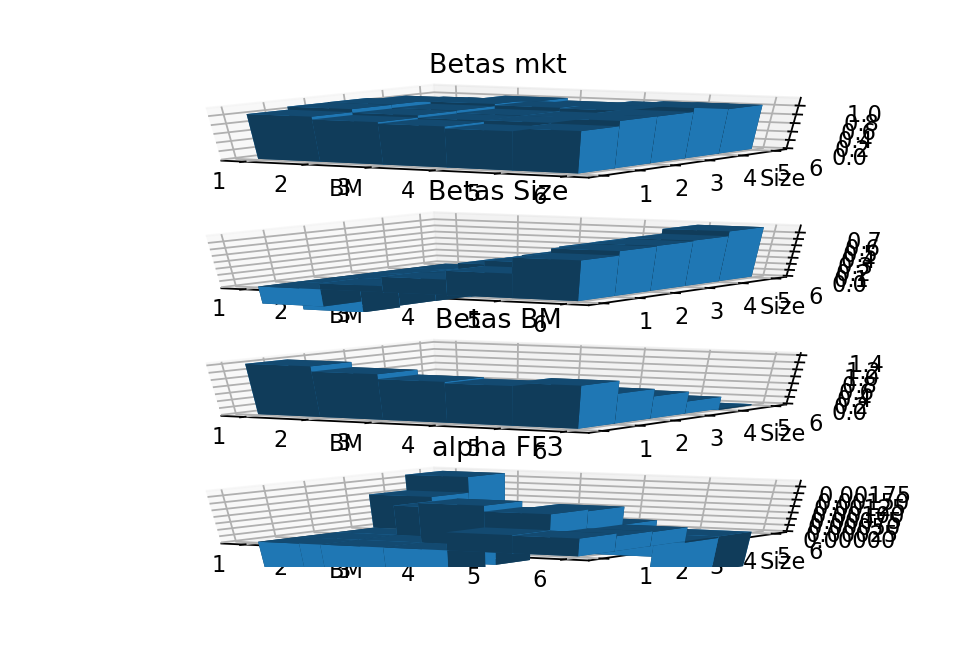

Text(0.5,0.92,'alpha FF3')

In [14]:
    
fig = plt.figure()
ax = fig.add_subplot(411, projection='3d')
top = FF3.betamkt
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(BM,Size, bottom, width, depth, top)
plt.xlabel('BM')
plt.ylabel('Size')
ax.set_title('Betas mkt')

ax = fig.add_subplot(412, projection='3d')
top = FF3.betahml
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(BM,Size, bottom, width, depth, top)
plt.xlabel('BM')
plt.ylabel('Size')
ax.set_title('Betas Size')

ax = fig.add_subplot(413, projection='3d')
top = FF3.betasmb
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(BM,Size, bottom, width, depth, top)
plt.xlabel('BM')
plt.ylabel('Size')
ax.set_title('Betas BM')

ax = fig.add_subplot(414, projection='3d')
top = FF3.alpha
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(BM,Size, bottom, width, depth, top)
plt.xlabel('BM')
plt.ylabel('Size')
ax.set_title('alpha FF3')



But does it reduce mispricing?

<IPython.core.display.Javascript object>


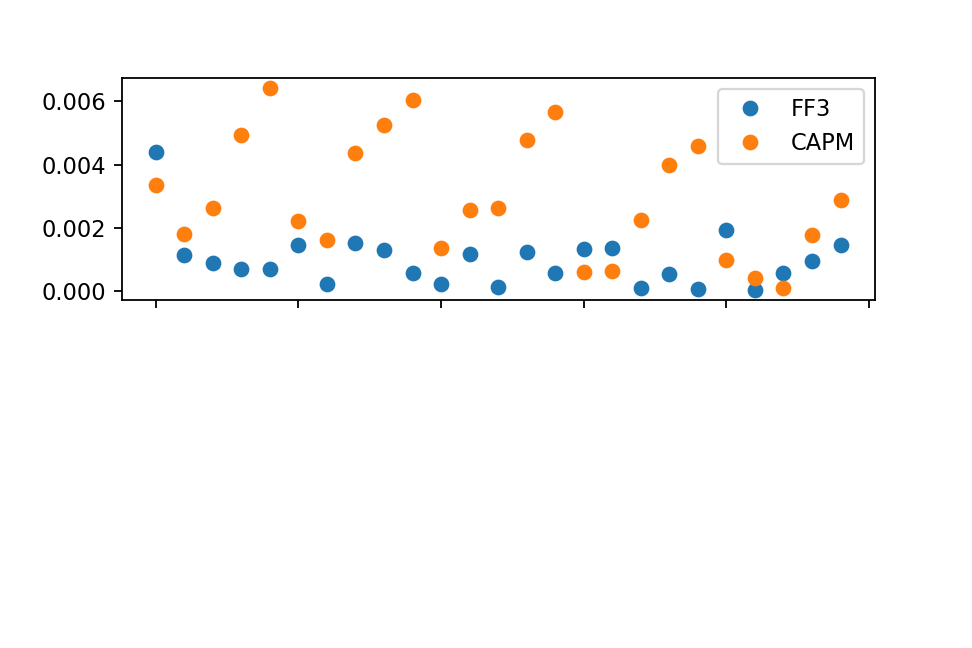

In [15]:
fig = plt.figure()
ax1 = plt.subplot(2,1,1)
FF3.alpha.abs().plot(ax=ax1,style='o')
CAPM.alpha.abs().plot(ax=ax1,style='o')

plt.legend(['FF3','CAPM'])
 


<IPython.core.display.Javascript object>


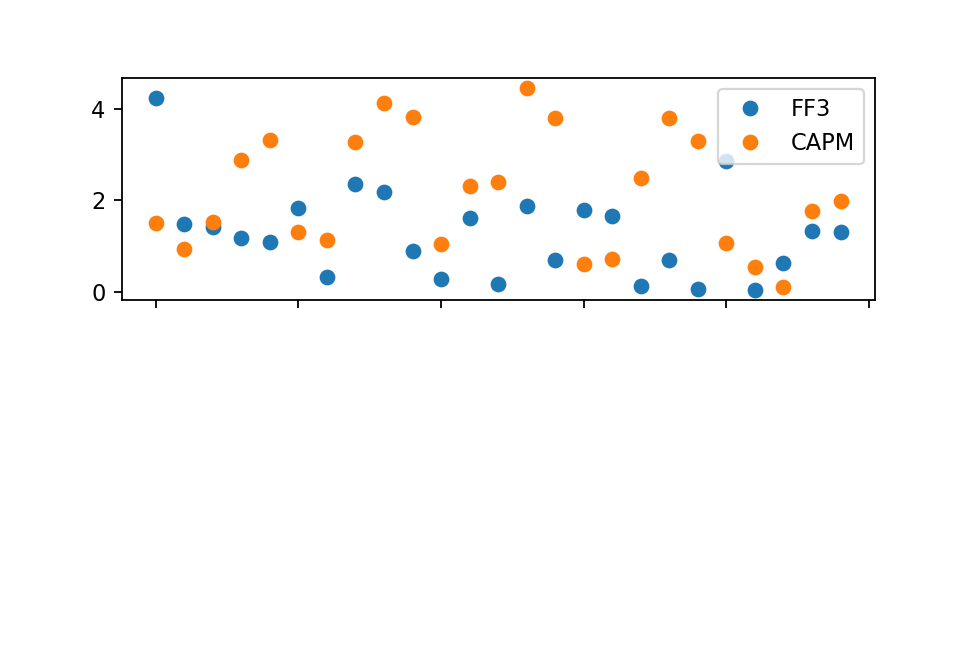

In [19]:
fig = plt.figure()
ax1 = plt.subplot(2,1,1)
FF3.talpha.abs().plot(ax=ax1,style='o')
CAPM.talpha.abs().plot(ax=ax1,style='o')

plt.legend(['FF3','CAPM'])

- This is the original sample, so it is a great sucess
- one way to summarise succes is to look at mean absolute pricing erros

$$average(|\alpha|)$$

You see below that it leads to reduction of about 30%



In [20]:
[CAPM.alpha.abs().sum(),FF3.alpha.abs().sum()]

[0.07375364094144668, 0.024577898308572647]

# GRS test for multifactor models



- Using multiple assets to test a model with multiple factors

Run Time-series regression asset by asset

$$R_i^e =\alpha_i+\sum_j\beta_{i,j} F_j^e+\epsilon_i$$

where $F_j^e$ are the different factors. All must be excess returns

- mkt
- hml
- smb

stack the alphas in a vector $\hat{\alpha}$

If you have N test assets you will have N time-series of residuals $\epsilon_i$

Use this to estimate the variance-covariance matrix of the assets  residual risk

$$\hat{\Sigma}_{\epsilon}=var([\epsilon_1,...,\epsilon_1])$$

This yield a N by N covariance matrix $\hat{\Sigma}_{\epsilon}$

Also estimate the factor covariance matrix  $\hat{\Sigma}_{F}$ and the factor expected return vector $\hat{\mu}_F$

$$T\left(1+\hat{\mu}\Sigma_F^{-1}\hat{\mu}'\right)^{-1}\hat{\alpha}\hat{\Sigma}_{\epsilon}^{-1}\hat{\alpha}' \sim Chi2(N)$$

In [46]:
# first the factor moments
muF=Data[['MKT','HML','SMB']].mean()
invCovF=np.linalg.inv(Data[['MKT','HML','SMB']].cov())
# the size of the sample
T=Data.shape[0]
# the inverse of the residual covariance matrix
invCov=np.matrix(np.linalg.inv(FF3Resid.cov()))
# the chi statistic!
chi=T*(1+(muF.values @ invCovF @ muF.values.T))**(-1)*(FF3.alpha.values @invCov@ FF3.alpha.values.T)
chi


matrix([[48.00140644]])

In [49]:
from scipy.stats import chi2
# choose degress of freedom (number of test assets)
dfreedom=FF3Resid.shape[1]

# look at P-value

(1-chi2.cdf(chi,dfreedom))*100


array([[0.37281732]])

# Economic vs statistical rejection

We see that the eventhough the FF3 reduce pricing erros by a lot.

- So variation in the betas of the 3 factor model can explain much more of the variation in average returns across assets

At the same time the GRS test still stronly reject the model.

- What is going on?

Asset pricing tests are always about Sharpe ratios

The FF3 model explains much more of the variation in average returns-- that is true-- but at the same time explains also a lot of the variation in realized returns

This means that the unexplained risk is much smaller-- making Appraisal ratios not that different from the CAPM.

For a practioner: it is very different to have SR of 1 with an alpha of 5%, vs SR of 1 with alpha of 0.5%

Why?

Because you will have to use much more leverage to exploit mispricing from the FF3 model!

The GRS tests treats these two things as equal, but they are only the same if if you don't face any costs of leveraging up


# PCA analysis



In [50]:
from statsmodels.multivariate.pca import PCA 

In [51]:
df=Data.drop(['MKT','SMB','HML'],axis=1)
pc=PCA(df)

In [52]:
# eigen values tell us the fraction  of variance that each eigen vector explains
pc.eigenvals/np.sum(pc.eigenvals)

0     0.859183
1     0.047626
2     0.031776
3     0.009991
4     0.007988
5     0.006264
6     0.005144
7     0.003756
8     0.003267
9     0.002991
10    0.002559
11    0.002202
12    0.002006
13    0.001928
14    0.001814
15    0.001582
16    0.001515
17    0.001422
18    0.001333
19    0.001222
20    0.001034
21    0.000954
22    0.000896
23    0.000829
24    0.000720
Name: eigenvals, dtype: float64

In [53]:
# first 3 eingenvectors explain quite a bit of total variance

np.sum(pc.eigenvals[0:3])/np.sum(pc.eigenvals)

0.9385843071341833

<IPython.core.display.Javascript object>


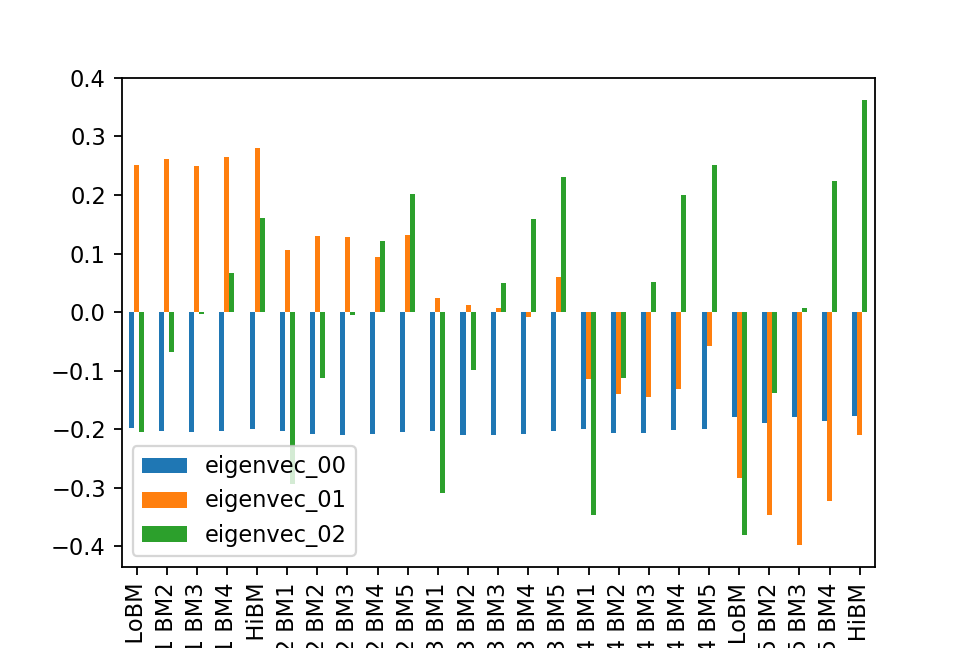

In [56]:
#Lets look at the first e engeinvectors
eigenvecs=pc.eigenvecs
eigenvecs.set_index(df.columns,inplace=True)
pc.eigenvecs[['eigenvec_00','eigenvec_01','eigenvec_02']].plot(kind='bar')

- Eingenvector 0 is flat across all the portfolios: 
        * The loadings are negative , but that is meaning-less
        * the negative of this explain jstu as much variance
        * only relative weights matter for variance
        
- Eigenvector 1 loads postive on small stock portfolios and negatively on big stock portoflio
        * again the fact that it is long small stocks, do not mean anything
        * what means something is that the portfolio is long small and short big (or equivalently, short small, long big)
 
 -Eigenvector 2 loads postively on low Book to market portfolios and negatively on high book to market
 
 
 Vector 0 is the market, vector 1 is small minus big (size), and -vector 2 is high minus low (value-growth) 

In [57]:
eigenvecs3=eigenvecs.iloc[:,0:3]
eigenvecs3

,eigenvec_00,eigenvec_01,eigenvec_02
SMALL LoBM,-0.197365,0.251828,-0.205357
ME1 BM2,-0.202450,0.261948,-0.068211
ME1 BM3,-0.204386,0.249367,-0.002957
ME1 BM4,-0.202640,0.264198,0.065897
SMALL HiBM,-0.198899,0.280974,0.160553
ME2 BM1,-0.202559,0.105611,-0.292939
ME2 BM2,-0.208325,0.130693,-0.113050
ME2 BM3,-0.209300,0.128897,-0.005440
ME2 BM4,-0.207862,0.094836,0.120758
ME2 BM5,-0.204678,0.132221,0.200985


Lets look at the asse pricing properties of these factors

We reconstruct the factors

multiplying the eigenvector (these are the portfolio weights!) by the matrix of returns

$$PCFactors_t=EV @ R_t$$

Where $R_t$ is the vector of excess returns and @ denotes matrix multiplication (EV must be 1 by 25 and $R_t$ is 25 by 1)


In [80]:
PCFactors=df @ eigenvecs3.values
PCFactors.columns=['Level','Size','Bm']
PCFactors.tail()

,Level,Size,Bm
1993-08-31,-0.189347,0.001158,-0.013876
1993-09-30,-0.055803,0.063485,-0.025946
1993-10-31,-0.084129,0.049415,-0.024067
1993-11-30,0.134718,-0.020295,-0.000435
1993-12-31,-0.132598,-0.005111,-0.000634


In [81]:
PCFactors.mean()

Level   -0.034255
Size     0.005091
Bm       0.008763
dtype: float64

In [82]:
PCFactors.mean()/PCFactors.std()*np.sqrt(12)

Level   -0.456385
Size     0.268972
Bm       0.576419
dtype: float64

Lets compute a correlation with the Fama-French factors

In [83]:

pd.concat([PCFactors,Data[['MKT','SMB','HML']]],axis=1).corr()

,Level,Size,Bm,MKT,SMB,HML
Level,1.000000,-0.482949,0.323425,-0.946751,-0.619788,0.238144
Size,-0.482949,1.000000,-0.173578,0.213667,0.967002,-0.037444
Bm,0.323425,-0.173578,1.000000,-0.404721,-0.237034,0.972857
MKT,-0.946751,0.213667,-0.404721,1.000000,0.362464,-0.359219
SMB,-0.619788,0.967002,-0.237034,0.362464,1.000000,-0.102999
HML,0.238144,-0.037444,0.972857,-0.359219,-0.102999,1.000000


- The level factor is -MKT
- size is SMB
- bm is HML


The Fama-french factors end up being very well approximated by the first 3 principal component of 25 size/book-to-market sorted portfolios!

In [85]:
np.sqrt(12)*pd.concat([PCFactors,Data[['MKT','SMB','HML']]],axis=1).mean()/pd.concat([PCFactors,Data[['MKT','SMB','HML']]],axis=1).std()

Level   -0.456385
Size     0.268972
Bm       0.576419
MKT      0.325538
SMB      0.342398
HML      0.627022
dtype: float64

- level factor is a more correlated with size than market is
- ends up with slight higher SR
- size factors ends up with lower

- but very similar porperties overall

For intuition lets just re-normalize our factors

# Appendix

# Portfolios vs Stocks



Why test with portfolios rather than just look at stocks?

 i. Individual stocks have $\sigma$ = 40 − 80%, so $\sigma/\sqrt{T}$ makes it nearly impossible to accurately measure E(R). Portfolios have lower $\sigma$ by diversification.

ii. Betas are badly measured too, and vary over time. 
        
   - example: every firm starts small and risky, but eventually some of then become big and safe
        
iii. You need an interesting alternative. Group stocks together that might have a violation,
this gives much more power.

iv. This is what people do to (try to) make money. They don’t randomly buy stocks.
They buy stocks with certain characteristics that they think will outperform. Thus,
keep tests and practice close.

v. The CAPM seemed fine (and still does) until stocks were grouped by B/M. The
CAPM still works fine for some groupings (size), not others (value) .

But of course you need to know how to form portfolios which characteristcs to use.

And here the sky is the limit, as long you are careful about false discovery!

Examples:

- Stocks talked about in the media
- Stocks of CEOs tweeted by the President
- Stocks with recent deal annoucements
- Stocks with a lot of google search trafic (google trends)
- Stocks with a lot of Tweeter activity
- Stocks that are investing a alot
- Stocks that are very profitable
- Stocks that doing a lot of R&D
- Stocks invested by Famous hedge fund managers
- Stocks invested by less famous managers
- Stokcs invested by Warren Buffet


The basic approach is always the same.

1. Choose a characteristic that you have a hunch is correlated with expected returns
2. Construct a sort: quantile based, or categorical (tweeted/not tweented)
3. check what the average returns look like of the portfolio (not the individual stocks)
4. check if CAPM explains, or FF3, or....
5. Anomaly? must decide-> red pill or blue pill





The yearly sorting keeps the stocks inside the portfolios with similar characteristics


This sorting will "work" if these chracteristics are good proxies for risks that the average investor cares about

- will lead to spread in returns
- will lead to a factor

But it doesn't work always, if you use the first letter of stock ticker to construct 26 portfolios you are unlikely to get spread in average returns and most likely each portfolio will resemble the market portfolio but will much more volatility.

And even if you do find something--> likely garbage, very hard to think about an economic model that would deliver that pattern!


Lets look at the portfolios characteristics, i.e. size and Book-to-market of the different portfolios

This are the characterisitcs that were used to create the portfolios. 

In [22]:
url = "https://www.dropbox.com/s/ivay1g27nlxz7ml/25_Portfolios_5x5.CSV?dl=1"
parser = lambda date: pd.to_datetime(date,format='%Y%m')
Dataonsize = pd.read_csv(url,index_col=[0],parse_dates=[0],skiprows=3495,nrows=(1112-20),date_parser=parser)



parser = lambda date: pd.to_datetime(date,format='%Y')
Dataonbm = pd.read_csv(url,index_col=[0],parse_dates=[0],skiprows=4591,nrows=(91),date_parser=parser)

parser = lambda date: pd.to_datetime(date,format='%Y%m')
Dataonnumber = pd.read_csv(url,index_col=[0],parse_dates=[0],skiprows=2399,nrows=(1112-20),date_parser=parser)



In [24]:
(Dataonsize.tail(12).mean())

SMALL LoBM      242.772500
ME1 BM2         208.287500
ME1 BM3         239.580000
ME1 BM4         240.085000
SMALL HiBM      157.369167
ME2 BM1        1199.668333
ME2 BM2        1170.837500
ME2 BM3        1167.068333
ME2 BM4        1165.136667
ME2 BM5        1193.480000
ME3 BM1        2757.411667
ME3 BM2        2660.211667
ME3 BM3        2778.423333
ME3 BM4        2820.606667
ME3 BM5        2799.120833
ME4 BM1        7088.297500
ME4 BM2        6835.723333
ME4 BM3        7357.800833
ME4 BM4        5996.445833
ME4 BM5        8373.251667
BIG LoBM      57827.368333
ME5 BM2       63892.439167
ME5 BM3       41665.754167
ME5 BM4       52191.470000
BIG HiBM      55019.618333
dtype: float64

In [25]:
(Dataonbm.tail(12).mean())

SMALL LoBM    0.188333
ME1 BM2       0.390833
ME1 BM3       0.550833
ME1 BM4       0.760833
SMALL HiBM    1.330000
ME2 BM1       0.172500
ME2 BM2       0.364167
ME2 BM3       0.529167
ME2 BM4       0.715000
ME2 BM5       1.179167
ME3 BM1       0.178333
ME3 BM2       0.352500
ME3 BM3       0.495833
ME3 BM4       0.697500
ME3 BM5       1.175833
ME4 BM1       0.174167
ME4 BM2       0.339167
ME4 BM3       0.490833
ME4 BM4       0.697500
ME4 BM5       1.127500
BIG LoBM      0.183333
ME5 BM2       0.348333
ME5 BM3       0.524167
ME5 BM4       0.705000
BIG HiBM      1.115000
dtype: float64

<IPython.core.display.Javascript object>


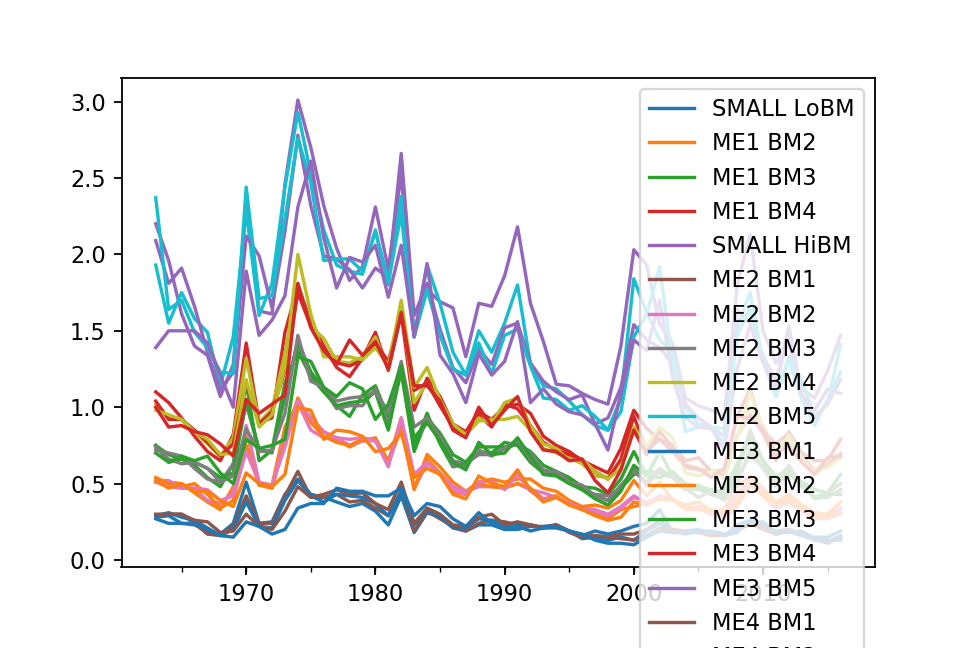

In [27]:
Dataonbm['1963':'2018'].plot()

- indeed, the key is that each portfolio has stocks of vastly different characterisitcs
- and keeps churning as firms change
- So when MSFT transitioned from being small in the 80 to be gigantic in the 90's it move up from the small to the big portfolios
- When in the Tech boom it had a huge valuation relative to it'sbook value, it wen to the low BM portfolios
- But then transtioned back to the high BM once it's market valuation collapsed in the aftermath of the techbuble
- The key is that firms change what they are, so by constructing the portfolios we can hope to estimate some stable relationship between risk and return




The the fact that the market value is above or below the book value does not mean that the firm is mispriced. It is natural that expectations of future earnings change (this is not in book value) of investors perception of risk change.

Even in a CAPM world you can see that happening: suppose the beta of a firm increases, then in equilibrium it's excess return must also increase! 

This would market it's market value go down, Book-to-market would go up at the smae time that expected returns going froward would go up!

- But in the data BM changes (as firms swing across portfolios), but the market beta does not, which is inconsitent with the CAPM

- Expected return alone is not a puzzle. All puzzles are joint puzzles of expected return and beta — either high expected returns not matched by high betas, or high/low betas not matched by expected returns.

The lower residual risk allows you a sharper exploration of the model mistakes

There is always a telescope, a way to make small-looking errors big (and profitable.)

